# Monte Carlo Paths: Random Walks and Brownian Motion Intuition

Goal:
- Simulate many paths of a discrete-time random walk
- Visualize path behaviour
- Connect random walks to (discrete) Brownian motion intuition

This is the path-simulation foundation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Discrete-Time Random Walk

We simulate a simple symmetric random walk:


$X_0 = 0,\quad X_{t} = \sum_{i=1}^{t} \varepsilon_i$


where each increment $\\varepsilon_i\$ is:
- +1 with probability 0.5
- -1 with probability 0.5

We will simulate many paths to see the distribution of outcomes.

In [2]:
n_steps = 252          # time steps per path
n_paths = 5_000        # number of simulated paths

# increments: shape (n_paths, n_steps)
eps = np.random.choice([-1, 1], size=(n_paths, n_steps))

# cumulative sum over time gives the random walk
X = np.cumsum(eps, axis=1)

# add X0 = 0 at the start for nicer plotting (optional)
X = np.hstack([np.zeros((n_paths, 1)), X])
X.shape

(5000, 253)

## Visualize a Few Paths

Multiple paths show the range of outcomes.

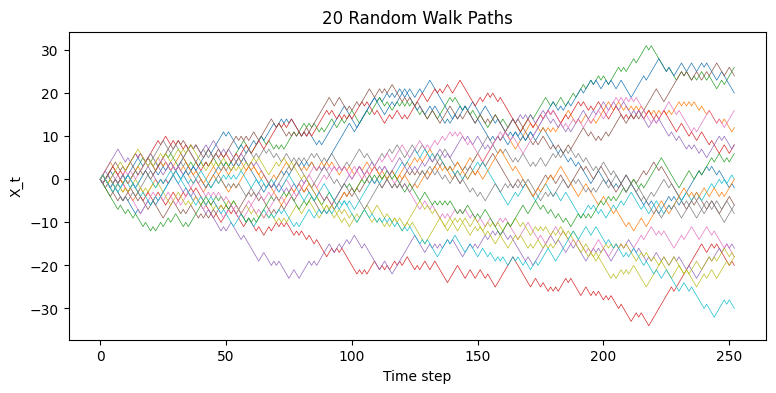

In [4]:
plt.figure(figsize=(9, 4))

for i in range(20):
    plt.plot(X[i], linewidth=0.5)

plt.xlabel("Time step")
plt.ylabel("X_t")
plt.title("20 Random Walk Paths")
plt.show()

## Terminal Distribution

We now look at the distribution of the final value
$X_T$

For a symmetric random walk:
- \$\mathbb{E}[X_T] = 0\$
- \$\mathrm{Var}(X_T) = T\$

So the standard deviation should scale like \$\sqrt{T}\$.

In [5]:
X_T = X[:, -1]

mean_XT = np.mean(X_T)
std_XT = np.std(X_T, ddof=1)

mean_XT, std_XT

(np.float64(-0.1556), np.float64(15.83695521462677))

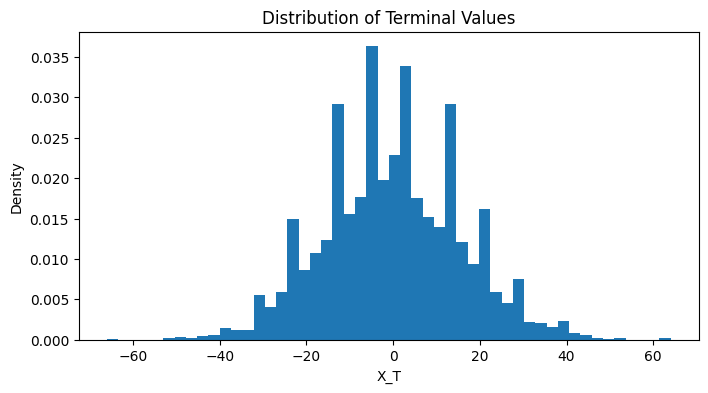

np.float64(15.874507866387544)

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(X_T, bins=50, density=True)
plt.xlabel("X_T")
plt.ylabel("Density")
plt.title("Distribution of Terminal Values")
plt.show()

np.sqrt(n_steps)

## Scaling Intuition (Toward Brownian Motion)

If we scale the random walk by $\sqrt{T}\$:

$Y_T = \frac{X_T}{\sqrt{T}}$


then $Y_T\$ tends to look more stable across different horizons.

This is the key normalization behind why random walks connect to Brownian motion.

In [7]:
Y_T = X_T / np.sqrt(n_steps)

np.mean(Y_T), np.std(Y_T, ddof=1)

(np.float64(-0.009801878666705954), np.float64(0.9976344052945233))

## Summary

- Simulated many random-walk paths efficiently (vectorized)
- Visualized dispersion across paths
- Checked terminal mean and variance scaling
- Introduced the \(\sqrt{T}\) normalization used in Brownian motion intuition

Next notebook will replace ±1 increments with Normal increments,
which is the direct stepping stone to GBM simulation later.